In [ ]:
import pandas as pd
import numpy as np
import tqdm
import copy
import pysam
from utils import *

In [ ]:
## download reference genome
! wget -P ./data/ https://ftp.ebi.ac.uk/pub/databases/gencode/Gencode_human/release_24/GRCh38.p5.genome.fa.gz
! gunzip ./data/GRCh38.p5.genome.fa.gz

In [ ]:
fasta = pysam.FastaFile("./data/GRCh38.p5.genome.fa")
tokenizer = T.BertTokenizer.from_pretrained("./model/")
model = load_model(tokenizer, "./model/model.bin")

prefix = "PRPF8_HepG2"
snp = "chrX:133985274:C>T"
strand = "-"

ref_seq, mut_seq = snp_2_seq(snp, strand, fasta)

ref_input = tokenize_seq(ref_seq,prefix,tokenizer)
mut_input = tokenize_seq(mut_seq,prefix,tokenizer)

ref_coverage = model(ref_input.to(model.model.device))
mut_coverage = model(mut_input.to(model.model.device))

ref_coverage = ref_coverage.detach().cpu().numpy()
mut_coverage = mut_coverage.detach().cpu().numpy()

array([0.64339715], dtype=float32)

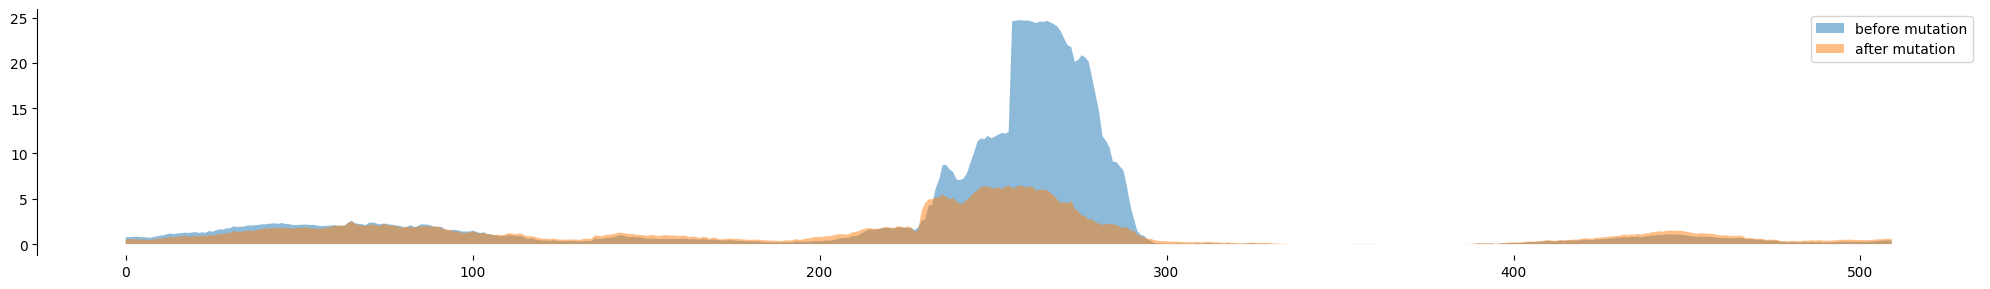

In [6]:
# mutation effect
plot_tracks_comparision({"before mutation":ref_coverage, "after mutation":mut_coverage})

calc_mutation_effect(ref_coverage, mut_coverage)